In [3]:
# k-최근접 이웃 회귀의 한계: 선형적인 데이터 예측 못하고 주변값들로만 예측

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
# print(perch_length.shape)
# print(perch_length)
perch_length = perch_length.reshape(-1,1)
# print(perch_length)

x_train, x_test,y_train, y_test= train_test_split(perch_length,perch_weight)

print(x_train.shape, x_test.shape)


(42, 1) (14, 1)


In [4]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3) 

model.fit(x_train,y_train)
print(model.predict([[50]])) #1500g 은 나와야하는데 먼가 잘못됨


[1000.]


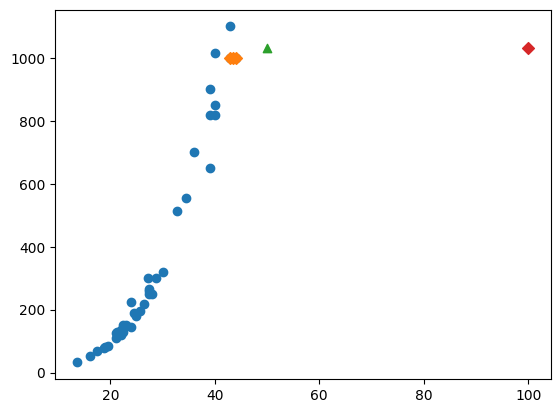

In [5]:
import matplotlib.pyplot as plt

distance, indexes = model.kneighbors([[50]])

plt.scatter(x_train, y_train)
plt.scatter(x_train[indexes], y_train[indexes], marker='D')

plt.scatter(50,1033,marker='^')
plt.scatter(100, 1033, marker='D')
plt.show()


[1209.85201355]
[38.31033927] -705.6649500188327


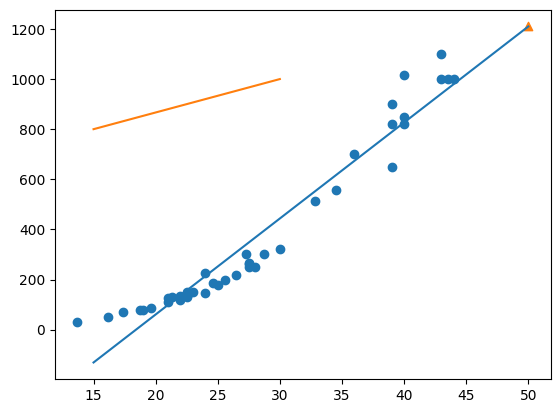

In [18]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
print(lr_model.predict([[50]]))
#   y     =  ax+b 
# 농어무게 = 기울기*농어길이 + 절편(함수와 축이 만나는지점)
print(lr_model.coef_ , lr_model.intercept_)

plt.scatter(x_train,y_train)
plt.plot([15,50], \
    [15*lr_model.coef_+lr_model.intercept_, 50*lr_model.coef_+lr_model.intercept_])
plt.scatter(50,1209.8,marker='^') 
plt.plot([15,30],[800,1000])  #test
plt.show()


In [19]:
print(lr_model.score(x_train,y_train))
print(lr_model.score(x_test,y_test))
# 훈련셋의 R2점수가 높기때문에 과대적합이라고 할수도 있지만 사실 둘다 점수가 낮기
# 때문에 과소적합이라고 보면된다
# y = ax^2 +bx +c

0.9393388778319379
0.8551738479487145


In [28]:
x_train_poly = np.column_stack((x_train**2, x_train))
x_test_poly = np.column_stack((x_test**2, x_test))
print(x_train_poly.shape, x_test_poly.shape)
# print(x_train)
# print(x_train_poly)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)
print(lr.predict([[50**2,50]]))
print(lr.coef_, lr.intercept_)

(42, 2) (14, 2)
[1536.95264762]
[  1.04528351 -25.00944777] 174.21625977134363


[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]


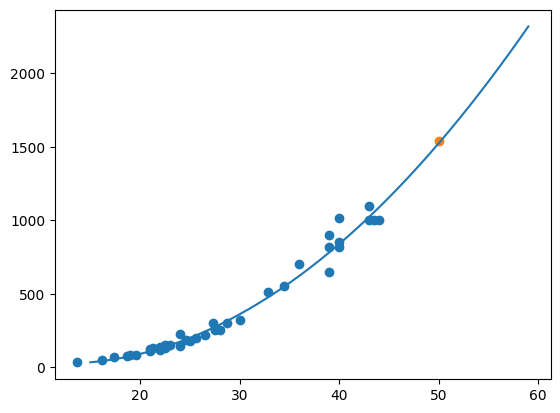

In [32]:
point = np.arange(15,60)
plt.scatter(x_train, y_train)
plt.plot(point, 1.04*point**2 - 25*point + 174.21)
plt.scatter(50 ,1536.9)
print(point)

In [33]:
print(lr.score(x_train_poly,y_train))
print(lr.score(x_test_poly, y_test))
# 점수는 높아졌으나 과대적합되었다.



0.978648346470549
0.9526127070295957
